In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import xgboost as xgb
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Set plotting style
plt.style.use('ggplot')  # Using 'ggplot' style instead of 'seaborn'

# Set figure size for better visibility
plt.rcParams['figure.figsize'] = [12, 8]

# Set font size for better readability
plt.rcParams['font.size'] = 12

In [3]:
# Load the data
data = pd.read_csv('df_join.csv')
print(data.shape)
data.head()

(144, 82)


,"Clothing and footwear, Percentage change, Previous period","Housing, Water, Electricity, Gas and Other Fuels, Percentage change, Previous period","Housing, Water, Electricity, Gas and Other Fuels",Restaurants and hotels,"Clothing and footwear, Percentage change, Previous year","Furnishings, household equipment and routine household maintenance, Percentage change, Previous year","Consumer Price Index, All items, Percentage change, Previous year","Food and non-alcoholic beverages, Percentage change, Previous year",Communication,Education,...,CPI_core,CPI_core 1-Month % Change,CPI_core 3-Month % Change,CPI_core 6-Month % Change,CPI_core 12-Month % Change,import_comm,import_comm 1-Month % Change,import_comm 3-Month % Change,import_comm 6-Month % Change,import_comm 12-Month % Change
0,-1.692365,0.151232,99.800488,97.163685,NaN,NaN,2.625709,-1.925063,100.102328,98.200945,...,220.086,0.0,-0.3,0.3,1.6,125.9,1.2,2.9,5.5,11.4
1,2.282037,-0.074967,99.725671,98.181436,NaN,NaN,2.143332,-1.469291,100.038487,98.323224,...,220.602,0.2,0.1,0.5,1.3,125.8,-0.1,1.4,3.9,11.3
2,2.102545,0.049301,99.774837,99.542993,NaN,NaN,2.313959,-0.644861,100.060433,98.510644,...,221.059,0.2,0.5,0.4,1.1,126.3,0.4,1.5,4.1,11.2
3,-0.116639,-0.071772,99.703226,99.970911,NaN,NaN,2.236447,-0.039848,100.113301,98.702634,...,221.166,0.0,0.5,0.2,0.9,127.7,1.1,1.4,4.4,11.2
4,-0.758523,0.060032,99.763080,100.486095,NaN,NaN,2.020986,0.303640,100.110308,98.748347,...,221.193,0.0,0.3,0.4,0.9,126.7,-0.8,0.7,2.1,8.5


In [4]:
# Check data types and missing values
print(data.dtypes)
print("\nMissing values:\n", data.isnull().sum())

Clothing and footwear, Percentage change, Previous period                               float64
Housing, Water, Electricity, Gas and Other Fuels, Percentage change, Previous period    float64
Housing, Water, Electricity, Gas and Other Fuels                                        float64
Restaurants and hotels                                                                  float64
Clothing and footwear, Percentage change, Previous year                                 float64
                                                                                         ...   
import_comm                                                                             float64
import_comm 1-Month % Change                                                            float64
import_comm 3-Month % Change                                                            float64
import_comm 6-Month % Change                                                            float64
import_comm 12-Month % Change           

In [5]:
# Basic statistical summary
data.describe()

,"Clothing and footwear, Percentage change, Previous period","Housing, Water, Electricity, Gas and Other Fuels, Percentage change, Previous period","Housing, Water, Electricity, Gas and Other Fuels",Restaurants and hotels,"Clothing and footwear, Percentage change, Previous year","Furnishings, household equipment and routine household maintenance, Percentage change, Previous year","Consumer Price Index, All items, Percentage change, Previous year","Food and non-alcoholic beverages, Percentage change, Previous year",Communication,Education,...,CPI_core,CPI_core 1-Month % Change,CPI_core 3-Month % Change,CPI_core 6-Month % Change,CPI_core 12-Month % Change,import_comm,import_comm 1-Month % Change,import_comm 3-Month % Change,import_comm 6-Month % Change,import_comm 12-Month % Change
count,144.000000,144.000000,144.000000,144.000000,133.000000,133.000000,144.000000,144.000000,144.000000,144.000000,...,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,0.040900,0.217478,114.550601,113.253296,0.231144,0.304625,1.971413,1.595340,96.219686,120.542732,...,246.295306,0.177083,0.524306,1.027778,1.977083,130.089583,0.075000,0.246528,0.513889,1.143750
std,1.965008,0.157659,10.886652,9.571908,2.462688,1.837847,1.275810,2.044801,3.702561,12.122163,...,17.131520,0.184625,0.411589,0.560899,0.736056,7.850034,0.961678,2.324088,3.716164,6.029458
min,-4.164688,-0.231395,99.703226,97.163685,-7.276342,-2.541995,-0.199517,-2.322437,90.044414,98.200945,...,220.086000,-0.500000,-0.500000,0.200000,0.600000,117.200000,-3.200000,-7.400000,-10.100000,-11.600000
25%,-1.544937,0.139306,104.384630,104.942436,-0.903707,-1.024793,1.236602,0.425231,91.679087,110.820903,...,231.528000,0.100000,0.300000,0.700000,1.700000,124.250000,-0.400000,-0.800000,-1.300000,-2.000000
50%,-0.047843,0.210464,112.598464,112.153959,0.078890,-0.370663,1.752098,0.988366,97.948201,122.282061,...,244.301500,0.200000,0.500000,0.950000,1.900000,126.800000,0.100000,0.400000,0.500000,0.100000
75%,1.539009,0.301767,124.101306,120.310425,1.372852,1.344030,2.319188,3.009394,99.573647,131.605893,...,259.359250,0.300000,0.725000,1.200000,2.200000,138.825000,0.700000,1.425000,2.300000,4.150000
max,4.538561,0.671368,136.225662,134.878301,5.975380,7.293395,7.036403,6.500177,100.358689,139.476654,...,283.908000,0.800000,2.400000,3.500000,5.500000,144.200000,3.000000,7.400000,12.400000,13.700000


C:\Users\Evans Sarker\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


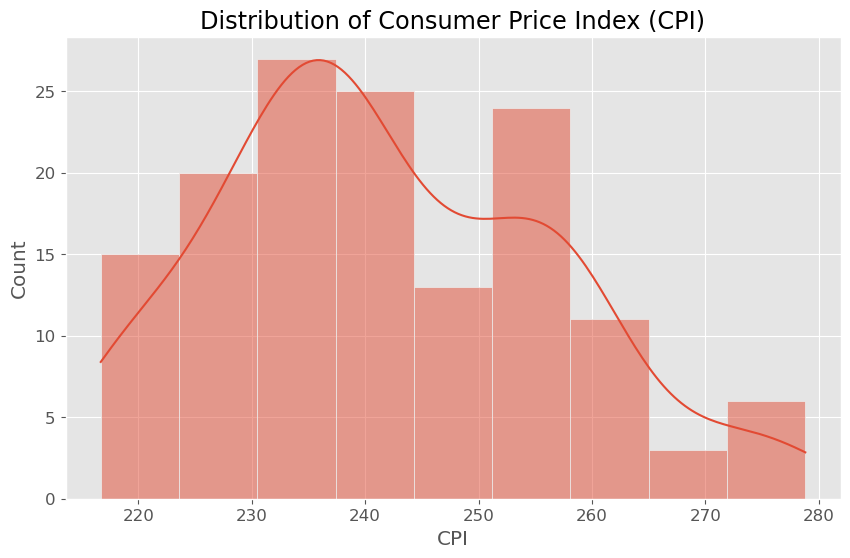

In [6]:
# Visualize distribution of target variable CPI
plt.figure(figsize=(10, 6))
sns.histplot(data['CPI'], kde=True)
plt.title('Distribution of Consumer Price Index (CPI)')
plt.show()

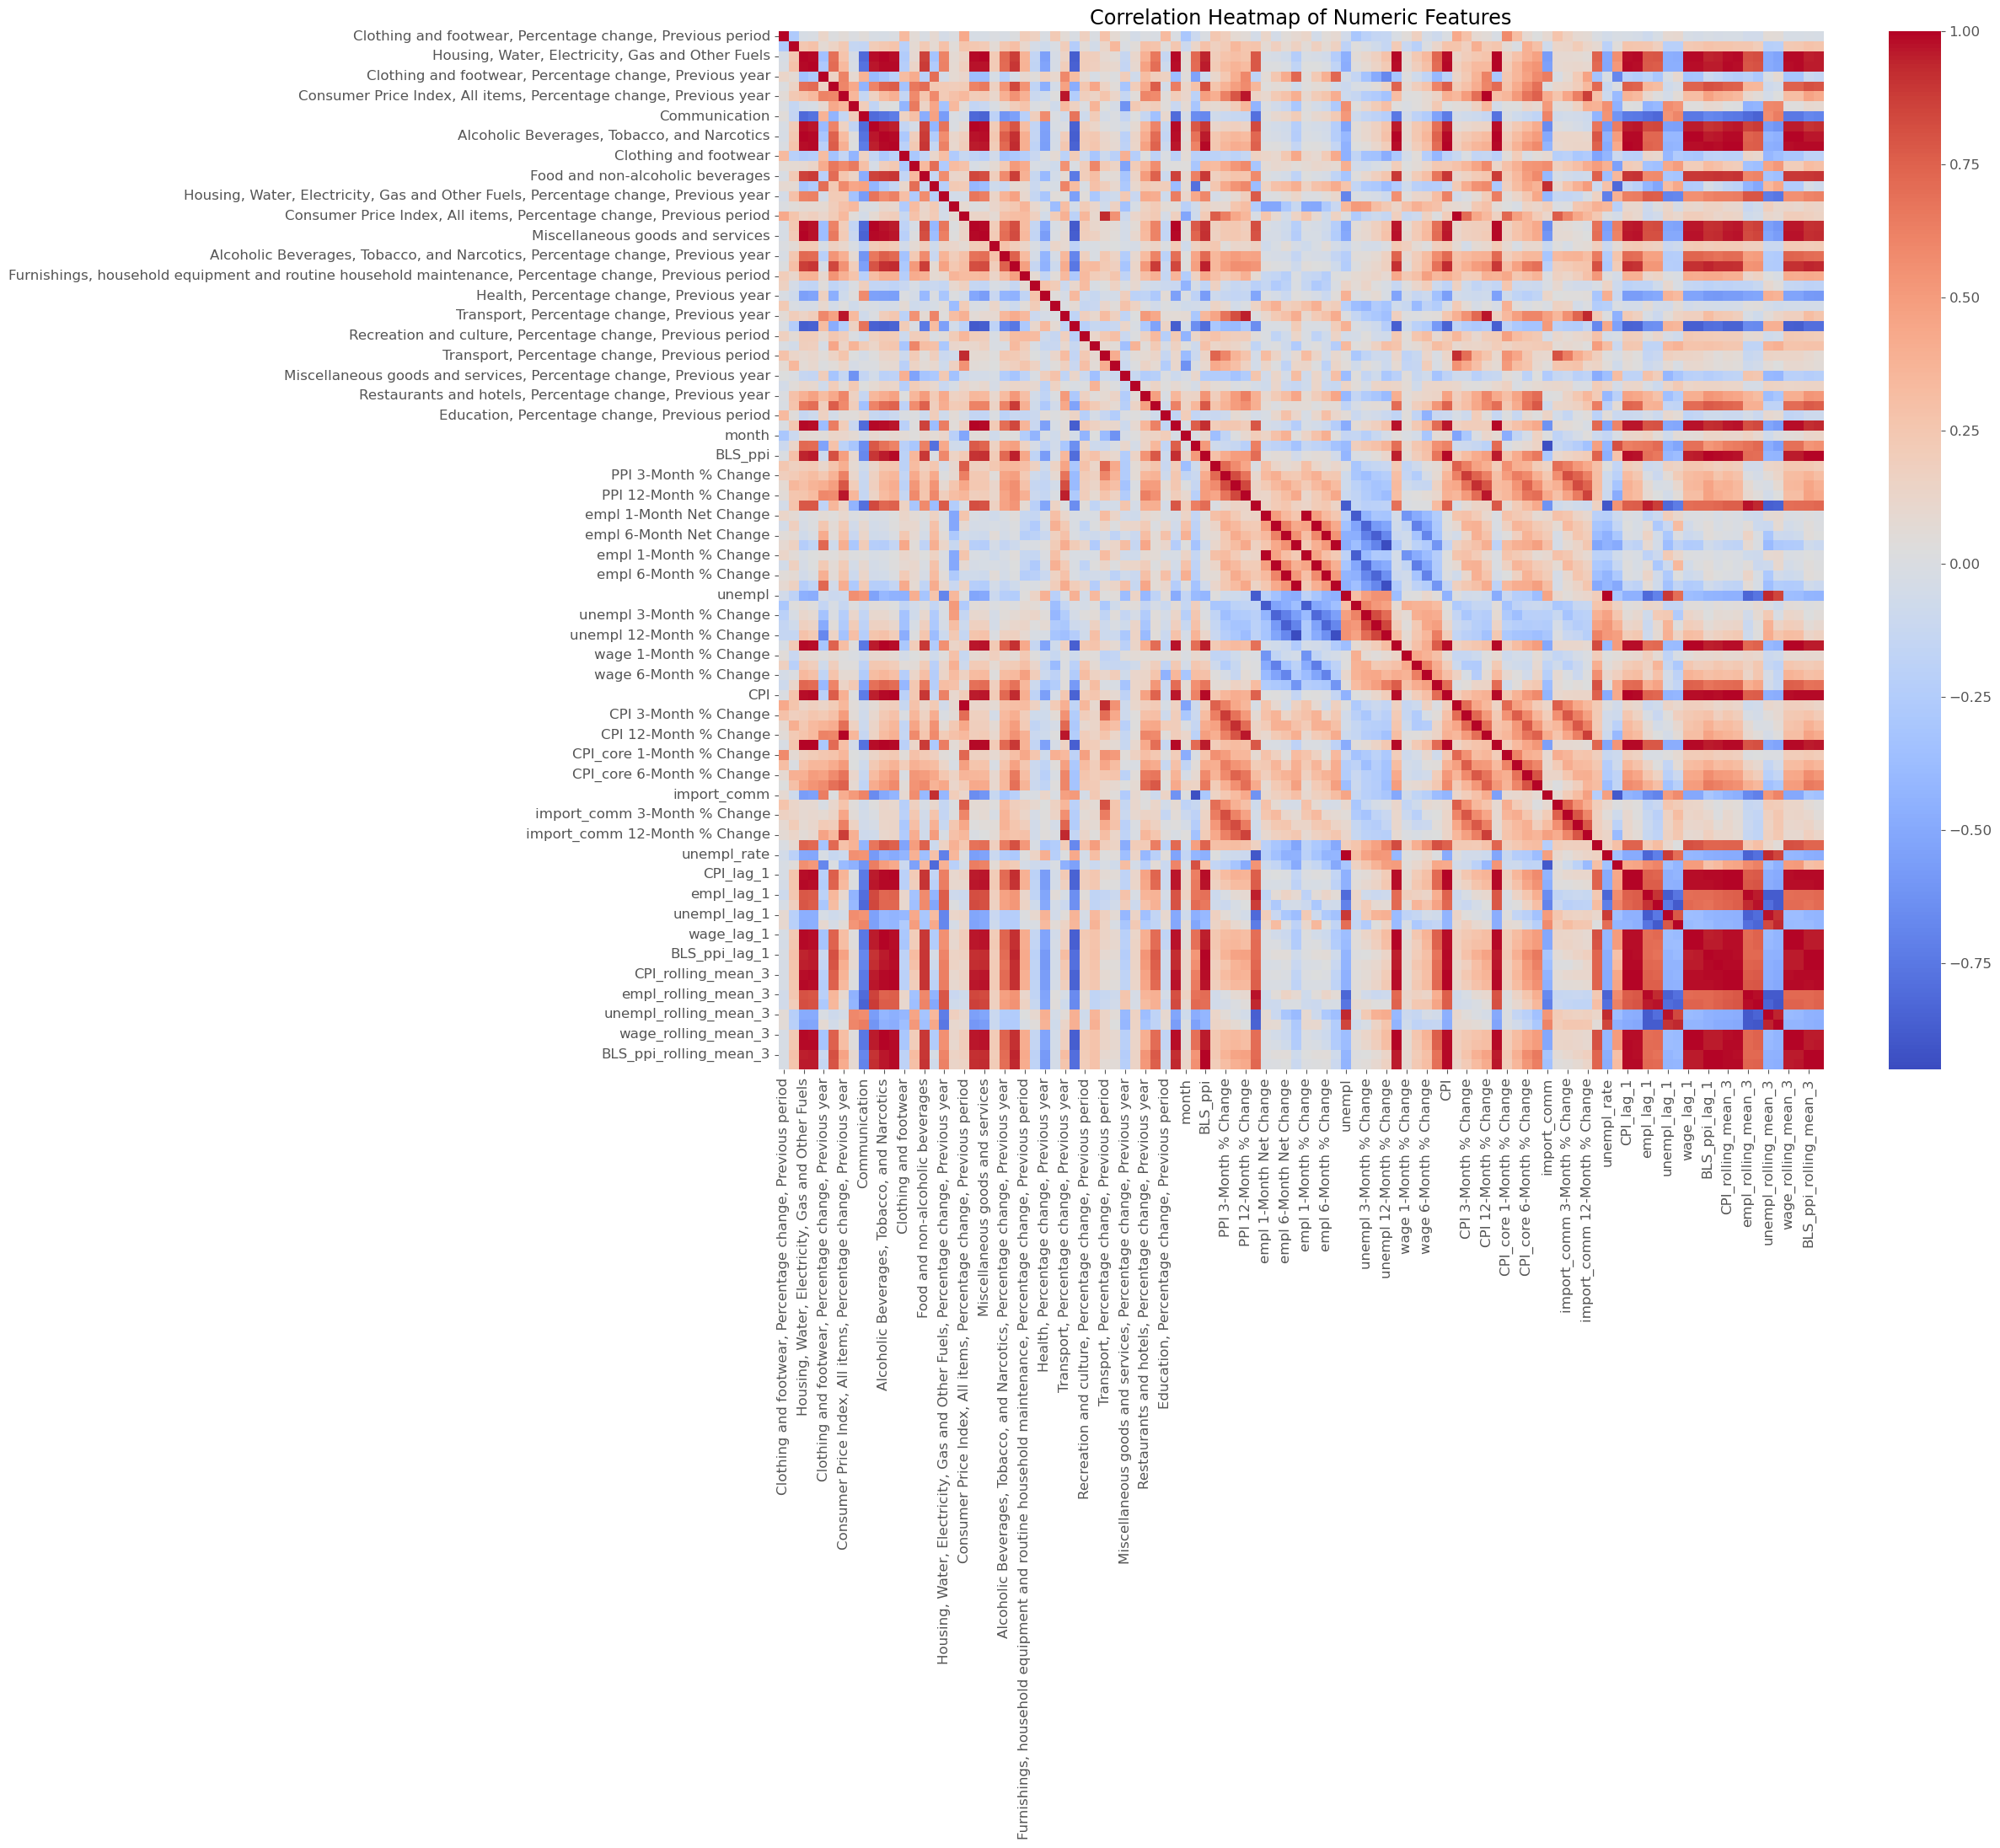

In [12]:
# Correlation heatmap
# Select only numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns
numeric_data = data[numeric_columns]

plt.figure(figsize=(20, 16))
sns.heatmap(numeric_data.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

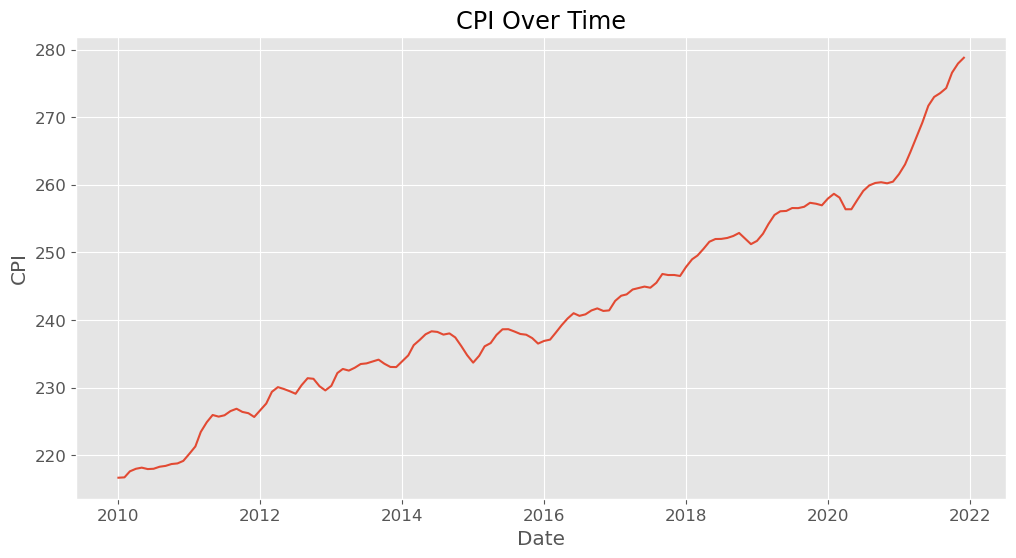

In [8]:
# Time series plot of CPI
data['Date'] = pd.to_datetime(data['Date'])
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['CPI'])
plt.title('CPI Over Time')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.show()

In [9]:
# Feature engineering
data['wage_to_empl_ratio'] = data['wage'] / data['empl']
data['unempl_rate'] = data['unempl'] / data['empl']
data['cpi_to_ppi_ratio'] = data['CPI'] / data['BLS_ppi']

# Create lag features
for col in ['CPI', 'empl', 'unempl', 'wage', 'BLS_ppi']:
    data[f'{col}_lag_1'] = data[col].shift(1)
    data[f'{col}_lag_3'] = data[col].shift(3)

# Create rolling mean features
for col in ['CPI', 'empl', 'unempl', 'wage', 'BLS_ppi']:
    data[f'{col}_rolling_mean_3'] = data[col].rolling(window=3).mean()
    data[f'{col}_rolling_mean_6'] = data[col].rolling(window=6).mean()

# Drop rows with NaN values created by lag and rolling features
data.dropna(inplace=True)

print(data.shape)

(133, 105)


In [13]:
# Check multicollinearity using VIF
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# Select numeric columns for VIF calculation
numeric_cols = data.select_dtypes(include=[np.number]).columns
vif_data = calculate_vif(data[numeric_cols])
print(vif_data.sort_values('VIF', ascending=False).head(10))

C:\Users\Evans Sarker\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                          variables           VIF
66                              CPI           inf
48          empl 1-Month Net Change           inf
47                             empl           inf
86                       empl_lag_1           inf
11  Consumer Price Index, All items  9.007199e+15
49          empl 3-Month Net Change  1.501200e+15
87                       empl_lag_3  3.216857e+14
39                             year  5.834270e+08
84                        CPI_lag_1  5.682043e+08
83                 cpi_to_ppi_ratio  5.466760e+08


In [14]:
# 1. Distribution of the target variable (CPI)
print("CPI Distribution:")
print(data['CPI'].describe())
from scipy import stats
print("Skewness:", data['CPI'].skew())
print("Kurtosis:", data['CPI'].kurtosis())
print("Shapiro-Wilk test p-value:", stats.shapiro(data['CPI'])[1])



CPI Distribution:
count    133.000000
mean     243.715504
std       13.648026
min      219.179000
25%      233.546000
50%      240.628000
75%      254.202000
max      278.802000
Name: CPI, dtype: float64
Skewness: 0.5603722064906494
Kurtosis: -0.34416648675155637
Shapiro-Wilk test p-value: 0.0004730809305328876


In [15]:
# 2. Correlation coefficients
corr_with_cpi = data.corr()['CPI'].sort_values(ascending=False)
print("\nTop 10 correlations with CPI:")
print(corr_with_cpi[:11])  # 11 because CPI itself will be included




Top 10 correlations with CPI:
CPI                                            1.000000
Consumer Price Index, All items                1.000000
CPI_rolling_mean_3                             0.998715
CPI_lag_1                                      0.998377
CPI_rolling_mean_6                             0.995547
CPI_lag_3                                      0.991120
CPI_core                                       0.989281
BLS_ppi_rolling_mean_6                         0.987818
BLS_ppi_rolling_mean_3                         0.987636
Alcoholic Beverages, Tobacco, and Narcotics    0.987541
BLS_ppi_lag_1                                  0.986698
Name: CPI, dtype: float64


In [ ]:
# 3. Time series characteristics
from statsmodels.tsa.stattools import adfuller
print("\nAugmented Dickey-Fuller test p-value:", adfuller(data['CPI'])[1])



In [16]:
# 4. Multicollinearity
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

numeric_cols = data.select_dtypes(include=[np.number]).columns
vif_data = calculate_vif(data[numeric_cols])
print("\nTop 10 features with highest VIF:")
print(vif_data.sort_values('VIF', ascending=False).head(10))



C:\Users\Evans Sarker\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



Top 10 features with highest VIF:
                          variables           VIF
66                              CPI           inf
48          empl 1-Month Net Change           inf
47                             empl           inf
86                       empl_lag_1           inf
11  Consumer Price Index, All items  9.007199e+15
49          empl 3-Month Net Change  1.501200e+15
87                       empl_lag_3  3.216857e+14
39                             year  5.834270e+08
84                        CPI_lag_1  5.682043e+08
83                 cpi_to_ppi_ratio  5.466760e+08


In [19]:
# Identify datetime columns
datetime_columns = data.select_dtypes(include=['datetime64']).columns

# Remove datetime columns from X
X = data.drop(['CPI'] + list(datetime_columns), axis=1)

# Convert remaining columns to numeric, replacing non-numeric values with NaN
X = X.apply(pd.to_numeric, errors='coerce')

# Remove any columns that are entirely NaN after conversion
X = X.dropna(axis=1, how='all')

# Fill remaining NaN values with the mean of each column
X = X.fillna(X.mean())

y = data['CPI']

In [20]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
print("\nTop 10 most important features:")
print(feature_importance.sort_values('importance', ascending=False).head(10))


Top 10 most important features:
                                              feature  importance
11                    Consumer Price Index, All items    0.111721
93                                 CPI_rolling_mean_3    0.063991
42                                            BLS_ppi    0.062871
99                                wage_rolling_mean_3    0.062477
2    Housing, Water, Electricity, Gas and Other Fuels    0.056424
100                               wage_rolling_mean_6    0.052960
70                                           CPI_core    0.052325
102                            BLS_ppi_rolling_mean_6    0.052024
10        Alcoholic Beverages, Tobacco, and Narcotics    0.045011
19                                             Health    0.042775


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42)
}

print("\nModel Performance:")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name}:")
    print(f"  R-squared: {r2_score(y_test, y_pred):.4f}")
    print(f"  MSE: {mean_squared_error(y_test, y_pred):.4f}")


Model Performance:
Linear Regression:
  R-squared: 1.0000
  MSE: 0.0000
Random Forest:
  R-squared: 0.9965
  MSE: 0.5293
XGBoost:
  R-squared: 0.9949
  MSE: 0.7874


In [22]:
# Residual analysis
from statsmodels.stats.diagnostic import het_breuschpagan
model = sm.OLS(y, sm.add_constant(X)).fit()
_, p_value, _, _ = het_breuschpagan(model.resid, model.model.exog)
print("\nBreusch-Pagan test p-value:", p_value)




Breusch-Pagan test p-value: 0.024919683450942753


In [23]:


# 9. Missing values
print("\nPercentage of missing values:")
print(data.isnull().sum() / len(data) * 100)




Percentage of missing values:
Clothing and footwear, Percentage change, Previous period                               0.0
Housing, Water, Electricity, Gas and Other Fuels, Percentage change, Previous period    0.0
Housing, Water, Electricity, Gas and Other Fuels                                        0.0
Restaurants and hotels                                                                  0.0
Clothing and footwear, Percentage change, Previous year                                 0.0
                                                                                       ... 
unempl_rolling_mean_6                                                                   0.0
wage_rolling_mean_3                                                                     0.0
wage_rolling_mean_6                                                                     0.0
BLS_ppi_rolling_mean_3                                                                  0.0
BLS_ppi_rolling_mean_6                           

In [24]:
# 10. Low variance features
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit(X)
low_variance_features = X.columns[~selector.get_support()]
print("\nFeatures with low variance:")
print(low_variance_features)


Features with low variance:
Index([], dtype='object')
